# BAD DRIVERS ?
![](https://electrek.files.wordpress.com/2014/07/tesla-crashes-into-sign-e1450795733591.jpg?quality=82&w=1500&h=0#038;strip=all&w=1000&h=500?raw=true)

## IMPORTING THE DATA (AND CLEANING HEADERS)

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open("bad-drivers.csv", "rU") as f:
    reader = csv.reader(f)
    bad_drivers = list(reader)

In [3]:
bad_drivers_title = bad_drivers[0]
bad_drivers_data = bad_drivers[1:]
bad_drivers_title

['State',
 'Number of drivers involved in fatal collisions per billion miles',
 'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding',
 'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired',
 'Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted',
 'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents',
 'Car Insurance Premiums ($)',
 'Losses incurred by insurance companies for collisions per insured driver ($)']

In [4]:
bad_drivers_short_title = ['State', 'Fatal/bil.miles', 'Speeding/fatal', 'Alcohol/fata', 'Sober/fatal', 'Clean/fata', 'Insurance_premium', 'Loses/driver']

__Summary_Data Dictionary__

----


|Column Header   	|Type   	|Original Title Name   	|
|-----------	    |:------:	    |---	|
|State   	        |Str      	|State   	|
|Fatal/bil.miles    |Float     	|Number of drivers involved in fatal collisions per billion miles   	|
|Speeding/fatal   	        |Int   	    |Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding   	|
|Alcohol/fata       |Int     	|Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired   	|
|Clean/fata         |Int     	|Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted  	|
|Insurance_premium  |Float     	|Car Insurance Premiums (dollars)  	|
|Loses/driver       |Float     	|Losses incurred by insurance companies for collisions per insured driver (dollars)  	|

In [30]:
print bad_drivers_data[1]

['Alaska', '18.1', '41', '25', '90', '94', '1053.48', '133.93']


## CREATING A DICTIONARY WITH HEADER:LIST PAIRS

In [5]:
# Convert int and float columns 
bad_drivers_data_num = []
for row in bad_drivers_data:
    bad_drivers_data_num.append([row[0], float(row[1]), int(row[2]), int(row[3]), int(row[4]), int(row[5]), float(row[6]), float(row[7])])

In [6]:
bad_drivers_data_dict = {}
for i in range(0,len(bad_drivers_short_title)):
    bad_drivers_data_dict[bad_drivers_short_title[i]] = [row[i] for row in bad_drivers_data_num]

## QUICK ANALYSIS OF DATA & SUMMARY STATS

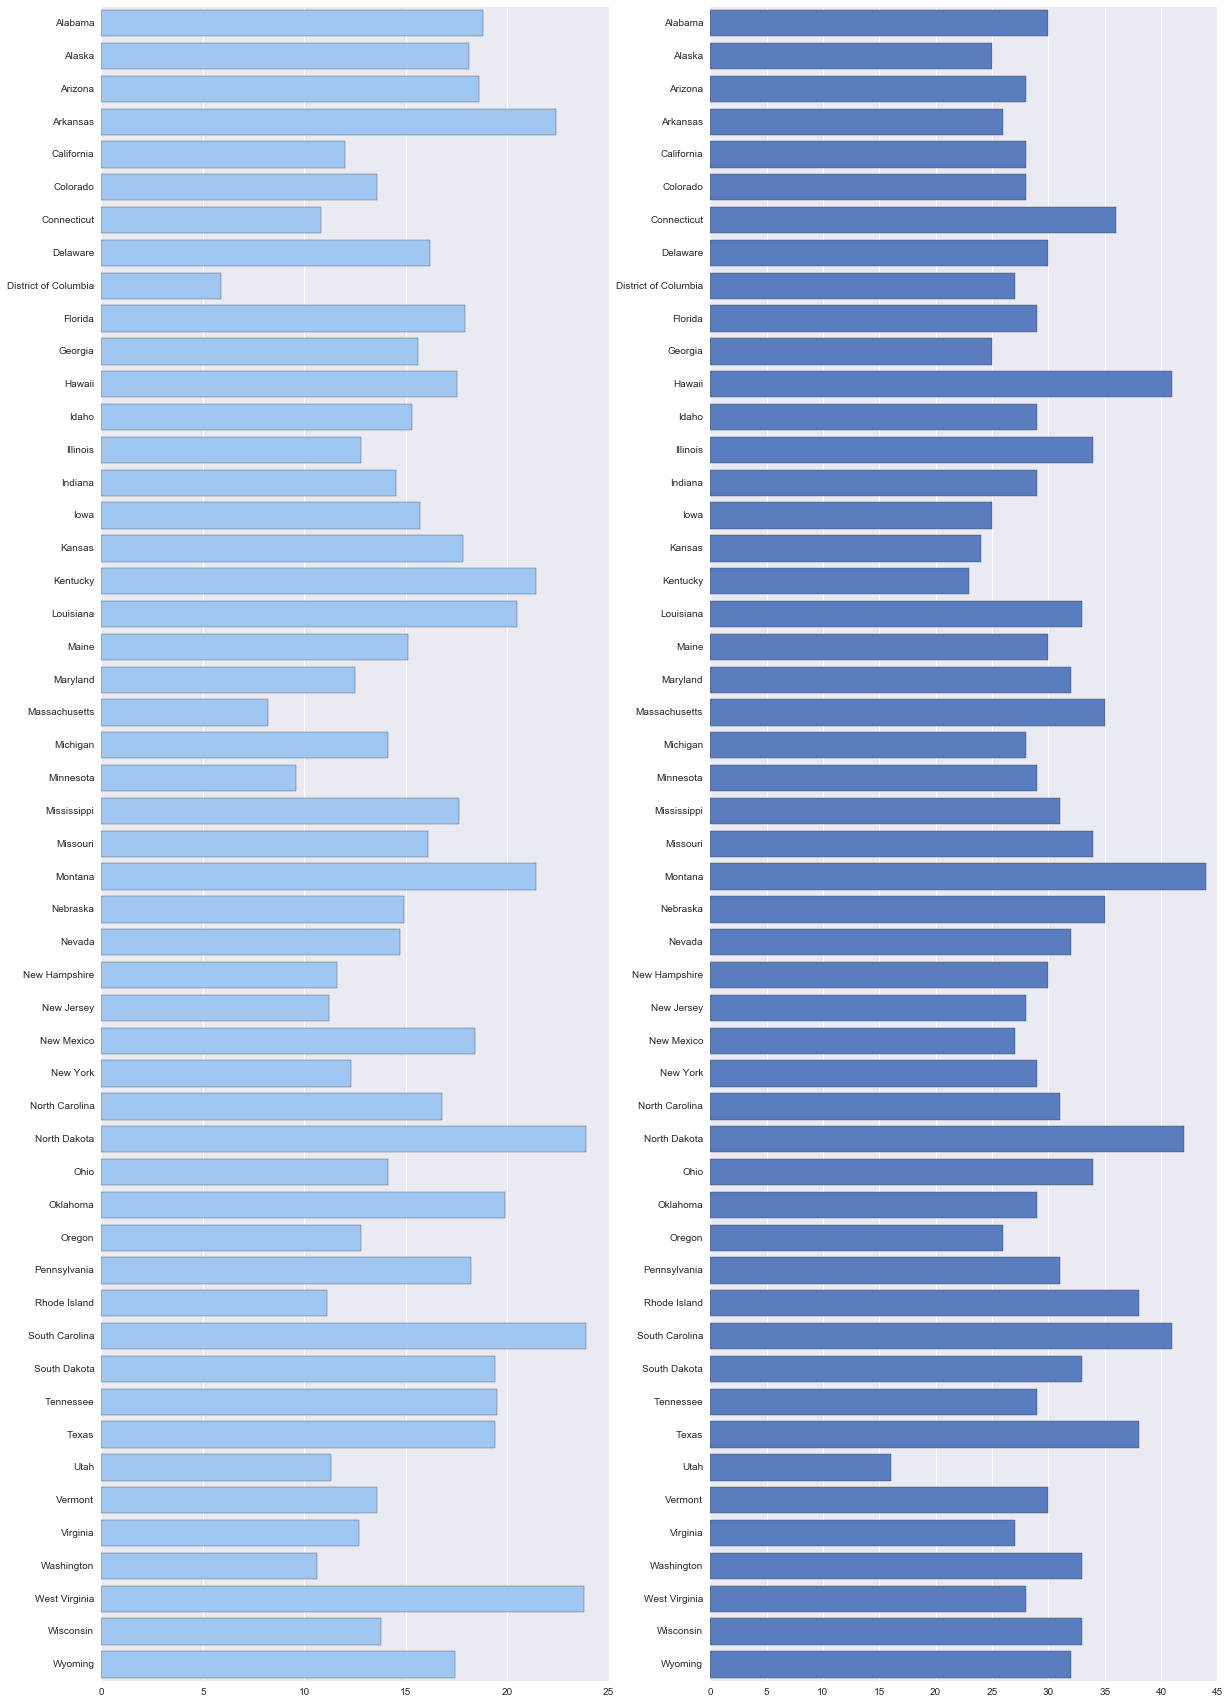

In [33]:
fig = plt.figure(figsize=[20,30])
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.set_color_codes("pastel")
bar_plot = sns.barplot(bad_drivers_data_dict['Fatal/bil.miles'],bad_drivers_data_dict['State'],ax=ax1,color="b")
sns.set_color_codes("muted")
bar_plot = sns.barplot(bad_drivers_data_dict['Alcohol/fata'],bad_drivers_data_dict['State'],ax=ax2,color="b")

In [8]:
for i in range(1,len(bad_drivers_short_title)):
    col_name = bad_drivers_short_title[i]
    col_data = bad_drivers_data_dict[col_name]
    if col_name <> "State":        
        print "Column: %s" % col_name
        print "------"
        print "Max: %s" % np.max(col_data)
        print "Min: %s" % np.min(col_data)
        print "Mean: %s" % np.mean(col_data)
        print "Median: %s" % np.median(col_data)
        print "25th Percentile: %s" % np.percentile(col_data,25)
        print "75th Percentile: %s" % np.percentile(col_data,75)
        print ""

Column: Fatal/bil.miles
------
Max: 23.9
Min: 5.9
Mean: 15.7901960784
Median: 15.6
25th Percentile: 12.75
75th Percentile: 18.5

Column: Speeding/fatal
------
Max: 54
Min: 13
Mean: 31.7254901961
Median: 34.0
25th Percentile: 23.0
75th Percentile: 38.0

Column: Alcohol/fata
------
Max: 44
Min: 16
Mean: 30.6862745098
Median: 30.0
25th Percentile: 28.0
75th Percentile: 33.0

Column: Sober/fatal
------
Max: 100
Min: 10
Mean: 85.9215686275
Median: 88.0
25th Percentile: 83.0
75th Percentile: 95.0

Column: Clean/fata
------
Max: 100
Min: 76
Mean: 88.7254901961
Median: 88.0
25th Percentile: 83.5
75th Percentile: 95.0

Column: Insurance_premium
------
Max: 1301.52
Min: 641.96
Mean: 886.957647059
Median: 858.97
25th Percentile: 768.43
75th Percentile: 1007.945

Column: Loses/driver
------
Max: 194.78
Min: 82.75
Mean: 134.493137255
Median: 136.05
25th Percentile: 114.645
75th Percentile: 151.87



In [9]:
def var(list):
    mean = sum(list) / len(list)
    sq_num = [(x-mean)**2 for x in list]
    var = sum(sq_num) / len(list)
    return var

def std(list):
    std = var(list) ** (1/2)
    return std

for i in range(1,len(bad_drivers_short_title)):
    col_name = bad_drivers_short_title[i]
    col_data = bad_drivers_data_dict[col_name]
    print "Columun: %s" % col_name
    print "------"
    print "Standard Deviation: %s" % np.std(col_data)
    print "Variance: %s" % np.var(col_data)
    print ""

Columun: Fatal/bil.miles
------
Standard Deviation: 4.08139032933
Variance: 16.6577470204

Columun: Speeding/fatal
------
Standard Deviation: 9.53852545716
Variance: 90.983467897

Columun: Alcohol/fata
------
Standard Deviation: 5.08164785717
Variance: 25.8231449443

Columun: Sober/fatal
------
Standard Deviation: 15.0095958029
Variance: 225.287966167

Columun: Clean/fata
------
Standard Deviation: 6.89153624517
Variance: 47.4932718185

Columun: Insurance_premium
------
Standard Deviation: 176.539628308
Variance: 31166.2403631

Columun: Loses/driver
------
Standard Deviation: 24.5912276317
Variance: 604.728476432



## WHAT DRIVES INSURANCE PREMIUMS?

0.62311643852


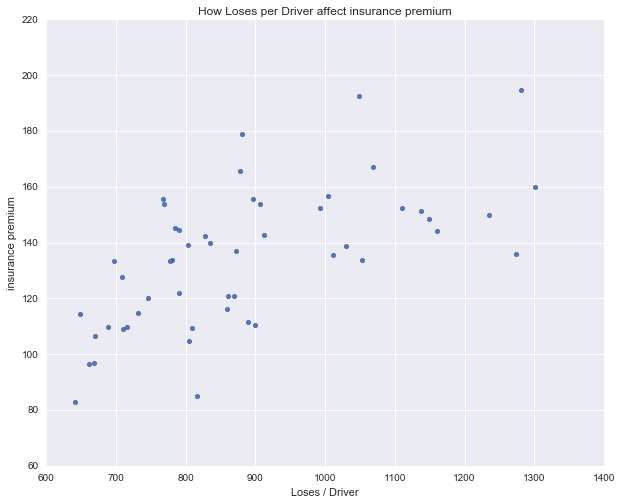

In [29]:
print np.corrcoef(bad_drivers_data_dict['Insurance_premium'], bad_drivers_data_dict['Loses/driver'])[0][1]
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
plt.scatter(bad_drivers_data_dict['Insurance_premium'], bad_drivers_data_dict['Loses/driver'])
ax.set(xlabel='Loses / Driver', ylabel='insurance premium', title='How Loses per Driver affect insurance premium')
plt.show()

-0.19970194569


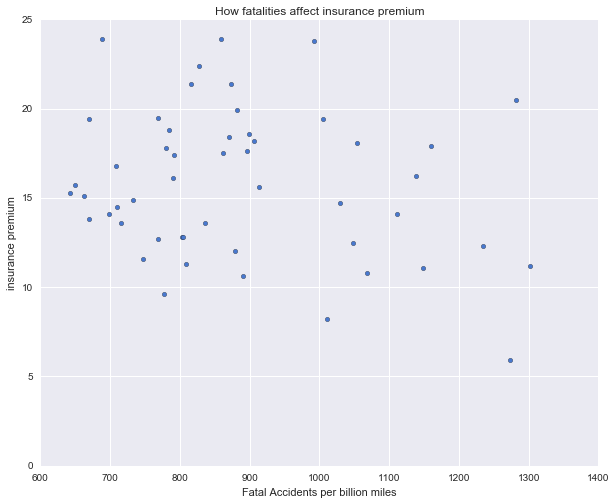

In [27]:
print np.corrcoef(bad_drivers_data_dict['Insurance_premium'], bad_drivers_data_dict['Fatal/bil.miles'])[0][1]
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
plt.scatter(bad_drivers_data_dict['Insurance_premium'], bad_drivers_data_dict['Fatal/bil.miles'])
ax.set(xlabel='Fatal Accidents per billion miles', ylabel='insurance premium', title='How fatalities affect insurance premium')
plt.show()

0.0755331378847


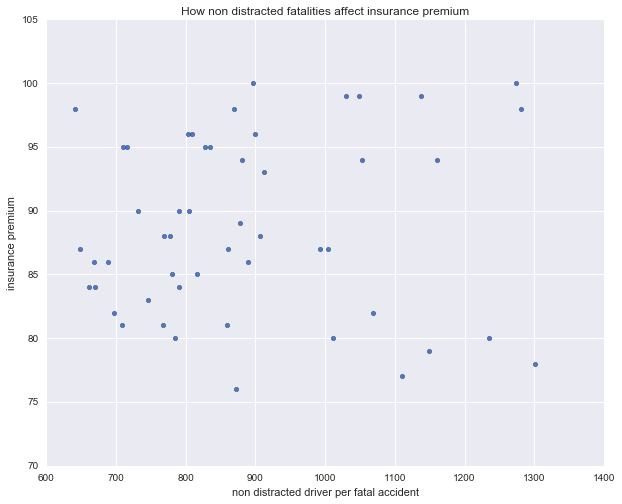

In [26]:
print np.corrcoef(bad_drivers_data_dict['Insurance_premium'], bad_drivers_data_dict['Clean/fata'])[0][1]
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.scatter(bad_drivers_data_dict['Insurance_premium'], bad_drivers_data_dict['Clean/fata'])
ax.set(xlabel='non distracted driver per fatal accident', ylabel='insurance premium', title='How non distracted fatalities affect insurance premium')
plt.show()

-0.0174507130374


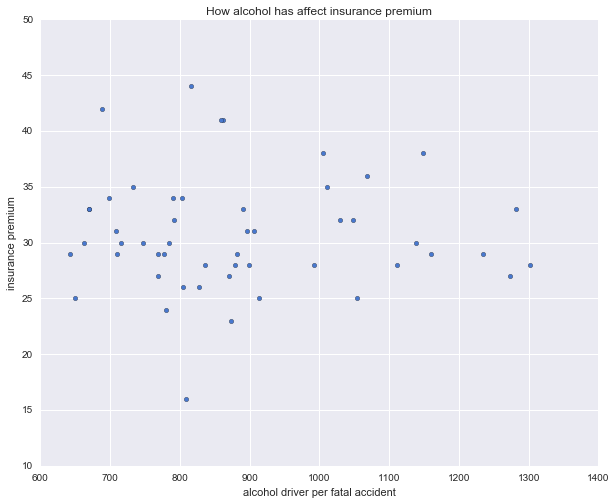

In [25]:
print np.corrcoef(bad_drivers_data_dict['Insurance_premium'], bad_drivers_data_dict['Alcohol/fata'])[0][1]
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.scatter(bad_drivers_data_dict['Insurance_premium'], bad_drivers_data_dict['Alcohol/fata'])
ax.set(xlabel='alcohol driver per fatal accident', ylabel='insurance premium', title='How alcohol has affect insurance premium')
plt.show()

# WHICH IS THE SAFEST STATE

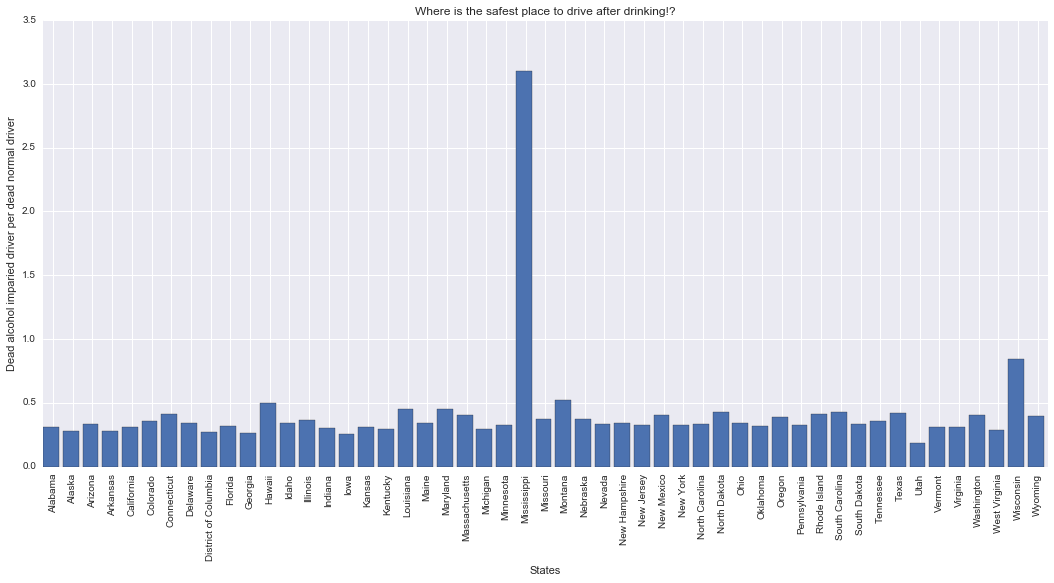

In [15]:
alcohol_sober = np.array(bad_drivers_data_dict['Alcohol/fata']).astype(float) + np.array(bad_drivers_data_dict['Sober/fatal']).astype(float)
num_alcohol = np.array(bad_drivers_data_dict['Alcohol/fata']).astype(float)
num_sober = np.array(bad_drivers_data_dict['Sober/fatal']).astype(float)

alcohol_over_sober = num_alcohol / num_sober

fig = plt.figure(figsize = (18,8))
ax = fig.add_subplot(111)
ax.bar(range(51), alcohol_over_sober)
ax.set(xlabel='States', ylabel='Dead alcohol imparied driver per dead normal driver', title='Where is the safest place to drive after drinking!?')
ax.set_xlim(left=0.0,right=51)
ax.set_xticks(np.array(range(len(bad_drivers_data_dict['State'])))+0.5)
ax.set_xticklabels(bad_drivers_data_dict['State'], rotation = 90)
plt.show()

# TABLEAU -->>